<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Lesson: Linear Regression - Train/Test Split

---

# Introduction

Let's practice train_test_split and k_folds cross validation.


### Here's What We Will Be Doing:

* Working with Boston housing data to predict the value of a home
* Create a test-train split of the data.
* Train each of your models on the training data.
* Evaluate each of the models on the test data.


**Then, we'll try k-folds cross validation.**

* Try a few different splits of data for the same models.
* Perform a k-fold cross-validation and use the cross-validation scores to compare your models. Did this change your rankings?


## Linear Regression Use Case

In this given task, you will be asked to model the median home price of various houses across U.S. Census tracts in the city of Boston. We are predicting a continuous, numeric output (price).

In [2]:
# Regular import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [9]:
# read in the dataset 
boston = pd.read_csv('../data/boston_data.csv')

### 1. Clean Up Data and Perform Exporatory Data Analysis

Boston data is from scikit-learn, so it ought to be pretty clean, but we should always perform exploratory data analysis.

In [9]:
# Exploratory data analysis in a function

In [10]:

def eda(dataframe):
    print(f"top 2 rows:\n {dataframe.head(2)}\n ")
    print(f"dataframe types: {dataframe.info} \n ")
    print(f"missing values: {dataframe.isnull().sum()} \n")
    print(f"dataframe describe: {dataframe.describe()}")
    
    for item in dataframe:
        print(item)
        print(dataframe[item].value_counts(), '\n')
        
    return None

In [11]:
# Run the EDA function 
eda(boston)

top 2 rows:
       CRIM   ZN   INDUS   CHAS    NOX     RM   AGE     DIS  RAD  TAX  PTRATIO  \
0  0.00632  18.0    2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0    7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   

   LSTAT  MEDV  
0   4.98  24.0  
1   9.14  21.6  
 
dataframe types: <bound method DataFrame.info of         CRIM   ZN   INDUS   CHAS    NOX     RM   AGE     DIS  RAD  TAX  \
0    0.00632  18.0    2.31     0  0.538  6.575  65.2  4.0900    1  296   
1    0.02731   0.0    7.07     0  0.469  6.421  78.9  4.9671    2  242   
2    0.02729   0.0    7.07     0  0.469  7.185  61.1  4.9671    2  242   
3    0.03237   0.0    2.18     0  0.458  6.998  45.8  6.0622    3  222   
4    0.06905   0.0    2.18     0  0.458  7.147  54.2  6.0622    3  222   
..       ...   ...     ...   ...    ...    ...   ...     ...  ...  ...   
501  0.06263   0.0   11.93     0  0.573  6.593  69.1  2.4786    1  273   
502  0.04527   0.0   11.93     0  0.573  6.120  7

## Using `scikit-learn` Linear Regression

### 2. Feature Selection - pick 3-4 predictors (i.e. CRIM, ZN, etc...) that you will use to predict our target variable, MEDV 


In [13]:
boston.columns

Index(['CRIM', ' ZN ', 'INDUS ', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'LSTAT', 'MEDV'],
      dtype='object')

In [12]:
# make the correlation matrix 
boston.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,0.543993,-0.468536


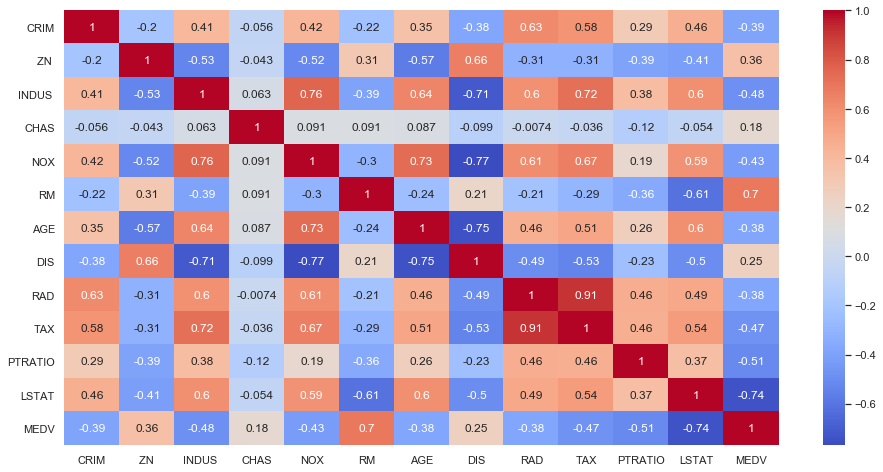

In [27]:
# create it in Seaborn
import seaborn as sns

sns.heatmap(boston.corr(), 
            cmap='coolwarm', # color pallete
            annot=True);     # add the numbers

sns.set(rc={'figure.figsize':(16, 8)}) # there are a bunch of ways to change the size
                                       # some you would expect to work, don't work 
                                       # https://stackoverflow.com/q/23969619/4590385

In [ ]:
# if you want to shuffle your data you can do it with the .sample method

In [29]:
boston.head(2)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6


In [35]:
shuffled_boston = boston.sample(frac=1, random_state=123)
shuffled_boston.head(2)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
410,51.13580,0.0,18.10,0,0.597,5.757,100.0,1.4130,24,666,20.2,10.11,15.0
85,0.05735,0.0,4.49,0,0.449,6.630,56.1,4.4377,3,247,18.5,6.53,26.6


In [36]:
# Create X and y with your features

In [37]:
features = ['LSTAT', 'RM', 'PTRATIO']
X = shuffled_boston[features]
y = shuffled_boston['MEDV']

### 3. Try a 70/30 train/test split (70% of the data for training - 30% for testing)


In [38]:
## make your first train test split
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.7, random_state=42)


In [41]:
## instantiate your Linear Regression model

lr_model = LinearRegression()

In [42]:
## fit the model
lr_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
## score the model using r squared

In [44]:
lr_model.score(X_test, y_test)

0.7046471058590543

### 4. Make a function that accepts X, y, and a float for the % of the data you want to use for training in train_test_split. The function should instantiate, fit, and score the model. Return the score. 

In [45]:
from sklearn.model_selection import cross_val_score

In [46]:
def tts(X, y, train_percent):
    '''
    Instantiate, fit, and score the model.

    '''
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=train_percent, random_state=42)
    lr = LinearRegression()
    lr.fit(X_train, y_train)
    score = lr.score(X_test, y_test)
    return score
    

In [47]:
## Call your model to test it

In [48]:
tts(X, y, 0.7)

0.7046471058590543

In [49]:
tts(X, y, 0.5)

0.698334366758194

In [50]:
tts(X, y, 0.8)

0.710417050078228

### 5. K-folds cross validation is a safer way to check performance than a single train_test_split. 

Recall that k-fold cross-validation creates a hold-out portion of your dataset for each iteration:

![](http://i.imgur.com/0PFrPXJ.png)

Update: (now k is 5 by default)

#### Perform k-folds cross validation, varying the number of folds from 5 through 10. Which number of folds scores best?

In [52]:
len(X)

506

In [53]:
X.head()

,LSTAT,RM,PTRATIO
410,10.11,5.757,20.2
85,6.53,6.630,18.5
280,3.76,7.820,14.9
422,14.10,5.648,20.2
199,4.56,6.975,17.0


In [55]:
# instantiating and fitting a linear regression model with the defaults
lr = LinearRegression()
cross_val_score(lr, X, y)

array([0.55120668, 0.68878622, 0.72095357, 0.77424965, 0.61407267])

In [72]:
# use a a list comprehension

my_scores = [cross_val_score(lr, X, y, cv = i) for i in range(5, 11)]
my_scores

[array([0.55120668, 0.68878622, 0.72095357, 0.77424965, 0.61407267]),
 array([0.53399922, 0.63200724, 0.81785448, 0.73276363, 0.68890126,
        0.59727846]),
 array([0.57202165, 0.52068984, 0.75017987, 0.70276052, 0.7753804 ,
        0.6168839 , 0.69244374]),
 array([0.57071131, 0.57677828, 0.65697591, 0.82199289, 0.6975847 ,
        0.73870881, 0.60368725, 0.69820855]),
 array([0.5482684 , 0.59932334, 0.58617947, 0.80840905, 0.83094528,
        0.70187262, 0.6692596 , 0.61120091, 0.67689826]),
 array([0.5413066 , 0.48378259, 0.56363221, 0.73557126, 0.82292941,
        0.64096587, 0.82486593, 0.68365854, 0.56707066, 0.6768071 ])]

In [73]:
# we could return only the means at the same time like this:
my_scores = [cross_val_score(lr, X, y, cv = i).mean() for i in range(5, 11)]
my_scores

[0.6698537584283356,
 0.6671340469650445,
 0.66147998701668,
 0.6705809614970133,
 0.6702618818621443,
 0.6540590167683474]

In [85]:
# to see the standard deviations:
my_scores = [cross_val_score(lr, X, y, cv = i).std() for i in range(5, 11)]
my_scores

[0.07881216835239083,
 0.09249890169766888,
 0.08727401899564212,
 0.08100325440177376,
 0.09214771731059378,
 0.11106423603569565]

In [75]:
# combine the number of folds and the mean score

dict(zip(range(5, 11), scores))

{5: 0.6698537584283356,
 6: 0.6671340469650445,
 7: 0.66147998701668,
 8: 0.6705809614970133,
 9: 0.6702618818621443,
 10: 0.6540590167683474}

In [76]:
# putting it in a DataFrame to make it pretty

In [77]:
pd.DataFrame(zip(range(5, 11), scores), columns=['K', 'Mean CV Score'])

,K,Mean CV Score
0,5,0.669854
1,6,0.667134
2,7,0.661480
3,8,0.670581
4,9,0.670262
5,10,0.654059


In [78]:
# alternative to a list comprehnsion, use a for loop

list_scores = []

for i in range(5, 11):
    my_score = cross_val_score(lr, X, y, cv=i).mean()
    list_scores.append(my_score)

In [63]:
list_scores

[0.6698537584283356,
 0.6671340469650445,
 0.66147998701668,
 0.6705809614970133,
 0.6702618818621443,
 0.6540590167683474]

Which makes you feel more confident about your model performance - TTS or cross validation? Why?

One other note. Instead of shuffling the DataFrame manually with `.sample()` you could use the `KFold` class to shuffle the data and create several folds. `cross_val_score` can then use the KFold object. 

In [84]:
from sklearn.model_selection import KFold

my_kfold_splitter = KFold(n_splits=5, shuffle=True, random_state=123)

# defaults are n_splits=5 and shuffle=False,

my_score = cross_val_score(lr, X, y, cv=my_kfold_splitter).mean()
my_score

0.6757530645752088